## Filtres passe-haut (High-pass filter) : détection de contours (edge detection)

In [27]:
# Import modules
import cv2
import matplotlib.pyplot as plt
from skimage import filters

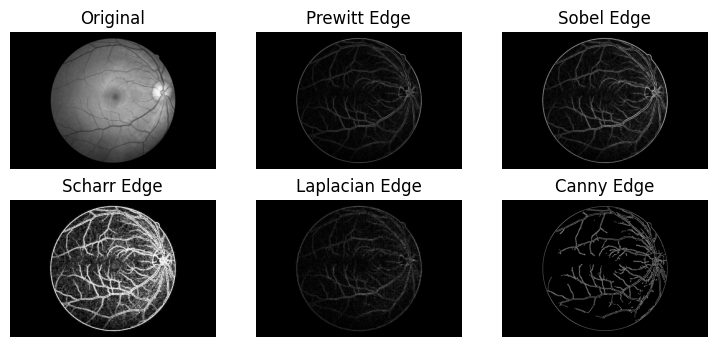

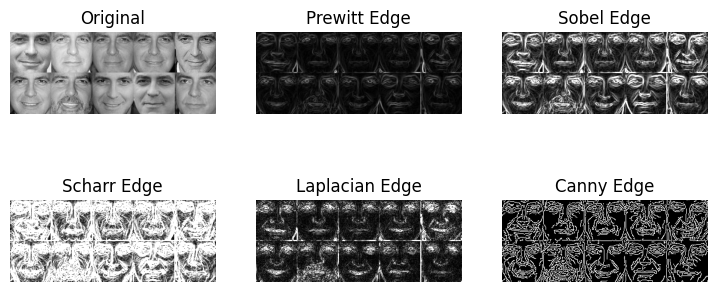

In [28]:
def compute_edge(image_name: str) -> None:
    """ Edge Detection using different filter """
    
    image = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)
    
    # For each filter change ksize to see different effect
    image_prewitt_skimage = filters.prewitt(image)
    #image_sobel_skimage = filters.sobel(image)
    
    image_laplacian = cv2.Laplacian(image, cv2.CV_64F, ksize=3)
    image_laplacian = cv2.convertScaleAbs(image_laplacian) # Values in [0, 255]
    image_sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    image_sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    image_sobel_magnitude = cv2.magnitude(image_sobelx, image_sobely)
    image_sobel_magnitude = cv2.convertScaleAbs(image_sobel_magnitude) # Values in [0, 255]
    image_scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    image_scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    image_scharr_magnitude = cv2.magnitude(image_scharrx, image_scharry)
    image_scharr_magnitude = cv2.convertScaleAbs(image_scharr_magnitude) # Values in [0, 255]
    image_canny = cv2.Canny(image,50, 100)
    
    # Plot results
    fig, axes = plt.subplots(2, 3, figsize=(9, 4))
    
    axes[0,0].imshow(image, cmap='gray')
    axes[0,0].set_title("Original")
    axes[0,0].axis('off')  # hide axes
    
    axes[0,1].imshow(image_prewitt_skimage, cmap='gray')
    axes[0,1].set_title("Prewitt Edge")
    axes[0,1].axis('off') 
    
    axes[0,2].imshow(image_sobel_magnitude, cmap='gray')
    axes[0,2].set_title("Sobel Edge")
    axes[0,2].axis('off')  
    
    axes[1,0].imshow(image_scharr_magnitude, cmap='gray')
    axes[1,0].set_title("Scharr Edge")
    axes[1,0].axis('off')  
    
    axes[1,1].imshow(image_laplacian, cmap='gray')
    axes[1,1].set_title("Laplacian Edge")
    axes[1,1].axis('off') 
    
    axes[1,2].imshow(image_canny, cmap='gray')
    axes[1,2].set_title("Canny Edge")
    axes[1,2].axis('off') 
    
    plt.show()
    
retina = "Images/database2/retina.jpg"
clooney = "Images/database2/clooney.png"
compute_edge(retina)
compute_edge(clooney)

# Try LoG later

### Trouver et dessiner les contours
Après avoir détecté les contours ou obtenu une image binaire , on peut extraire les contours dans le but de l'analyse de la forme des objets, de la détecttion et la reconnaissance d'objet.

**Contour** : c'est la courbe formée par la ligne qui relie les pixels de même intensité dans une image (couleur ou en niveau de gris) délimitant la frontière entre les différents éléments.

**Exemple** : Trouver les contours à partir de l'image résultante de la fonction Canny 

Nombre de contours trouvés : 269


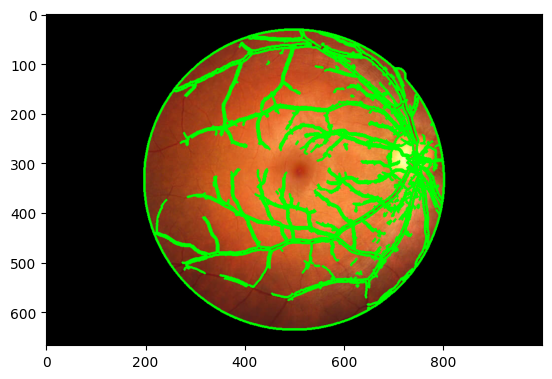

In [41]:
# find contours
retina = cv2.imread("Images/database2/retina.jpg", cv2.IMREAD_COLOR)
retina_gray = cv2.cvtColor(retina, cv2.COLOR_BGR2GRAY)
retina_canny = cv2.Canny(retina_gray,50, 100)
retina_canny_copy = retina_canny.copy()
# cv2.RETR_TREE : more detailed information on contour nesting,  cv2.RETR_EXTERNAL : external contour 
contours, hierarchy = cv2.findContours(retina_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) # alters image
print(f"Nombre de contours trouvés : {len(contours)}")

# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(retina, contours, -1, (0, 255, 0), 3) 
#cv2.imshow('Contours', retina) 
#cv2.waitKey(0) 
#cv2.destroyAllWindows()
plt.imshow(retina[:,:,::-1])
plt.show()